In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import yfinance as yf

import chart_studio.plotly as py
import plotly.express as px

## Pandas Datetime Index

In [12]:
pd.date_range('2020-10-01', periods=15, freq='D')
pd.date_range('Oct 01, 2020', periods=15, freq='D')
pd.to_datetime(['10/01/2020', '10/02/2020'], format='%d/%m/%Y')

arr1 = np.random.randint(10, 50, size=(3,3))
date_arr = pd.date_range('2020-01-01', periods=3, freq='D')
df1 = pd.DataFrame(arr1, columns=list('ABC'), index=date_arr)
df1.index.argmax()

2

## Time Resampling

In [18]:
t = yf.Ticker('AAPL')
df = t.history(period='1y')

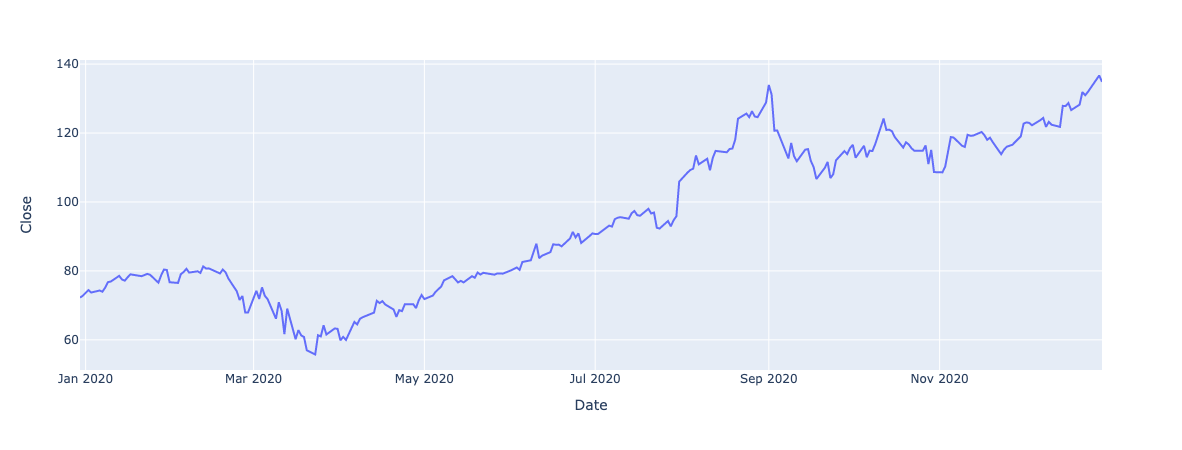

In [19]:
px.line(df, y='Close')

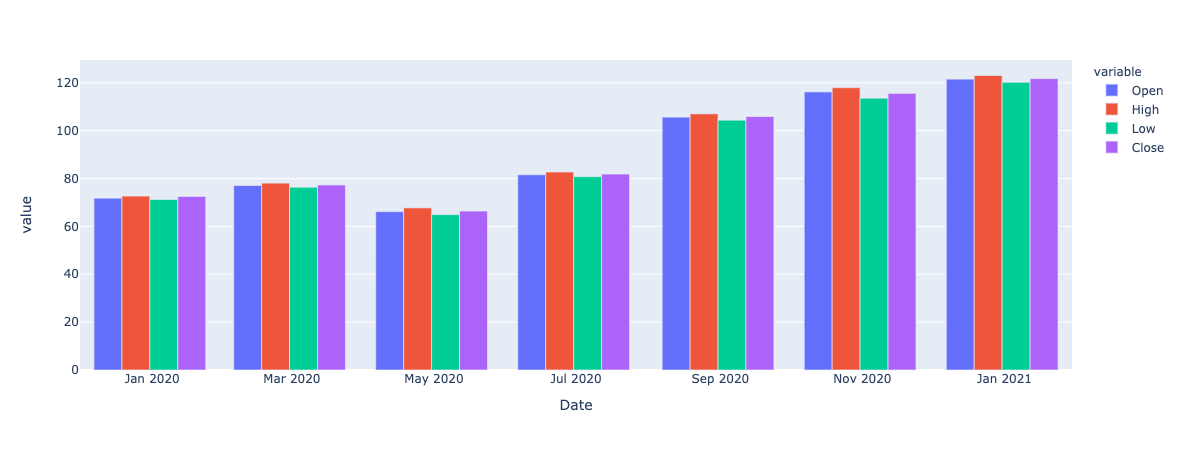

In [46]:
df.resample(rule='A').std()
vol = df['Volume'].resample('W').sum()
df1 = df.resample('W').mean()
df1['Volume'] = vol

df2 = df.resample(rule='2M').mean()
df2.drop(columns=['Volume', 'Dividends', 'Stock Splits'], inplace=True)
px.bar(df2, barmode='group')

## Moving Averages

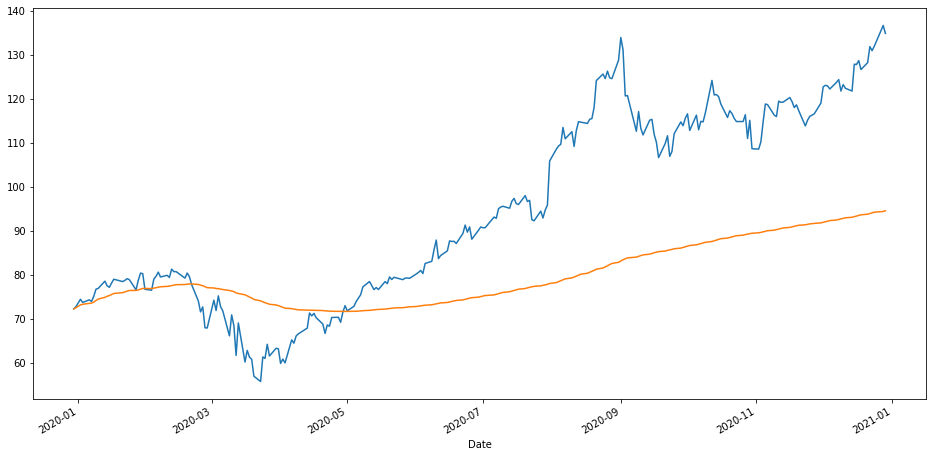

In [66]:
pd.options.plotting.backend = "matplotlib"
df['Close'].plot(figsize=(16,8))
df['Close'].expanding().mean().plot()
# df.rolling(window=30).mean()['Close'].plot()


## Shifting Time Data

In [70]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-30,71.745407,72.545996,70.694485,72.255997,144114400,0.0,0.0
2019-12-31,71.861898,72.791371,71.760275,72.783936,100805600,0.0,0.0
2020-01-02,73.425896,74.506568,73.165647,74.444603,135480400,0.0,0.0
2020-01-03,73.651440,74.501596,73.490333,73.720840,146322800,0.0,0.0
2020-01-06,72.818635,74.347924,72.560859,74.308266,118387200,0.0,0.0
...,...,...,...,...,...,...,...
2020-12-22,131.610001,134.410004,129.649994,131.880005,168904800,0.0,0.0
2020-12-23,132.160004,132.429993,130.779999,130.960007,88223700,0.0,0.0
2020-12-24,131.320007,133.460007,131.100006,131.970001,54930100,0.0,0.0
